## FAQ Algorithm
This is a script to perform the FAQ algorithm as specified in Joshua T. Vogelstein, et al. "Fast Approximate Quadratic Programming for Graph Matching". (2015)
## Requirements
Given two adjacency matrices A and B representative of some n-vertex graphs, the algorithm returns a permutation matrix that is a solution to a relaxed quadratic assignment problem

## Cell below contains main function


In [16]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from sinkhorn_knopp import sinkhorn_knopp as skp
sk = skp.SinkhornKnopp()

def FAQ(A,B):
    n = A.shape[0]  #number of vertices in graphs
    P = Pinit(n)
    At = np.transpose(A)  # A transpose
    Bt = np.transpose(B)  # B transpose
    
    #OPTIMIZATION WHILE LOOP BEGINS
    for i in range(30):
        delfp = A@P@Bt+At@P@B  # computing the gradient of f(P) = -tr(APB^tP^t)
        rows, cols = linear_sum_assignment(-delfp) # run hungarian algorithm on gradient(f(P))
        Q = np.zeros((n,n))  
        Q[rows,cols] = 1   # initialize search direction matrix Q
        def f(x):  #computing the original optimization function
            return np.trace(At@(x*P+(1-x)*Q)@B@np.transpose(x*P+(1-x)*Q))
        alpha = minimize_scalar(f, bounds=(0,1), method='bounded').x #computing the step size
        P = alpha*P + (1-alpha)*Q  # Update P
        
    #end of FW optimization loop
    rows, cols = linear_sum_assignment(-P) # run hungarian algorithm on Pfinal
    Pf = np.zeros((n,n))
    Pf[rows,cols] = 1   # project onto set of permutation matrices
    return Pf
        
        
def Pinit(num): #function that return a random doubly stochastic starting matrix, with number of vertices as input
    n = num
    sk = skp.SinkhornKnopp() 
    K = np.random.rand(n,n) #generate a nxn matrix where each entry is a random integer [0,1]
    for i in range(10): #perform 10 iterations of Sinkhorn balancing
        K = sk.fit(K)
    J = np.ones((n,n))/float(n) # initialize J, a doubly stochastic barycenter
    P = (K+J)/2
    return P

    
def ofv(A,B,P): #function to calculate objective function value based on permutation matrix
    return np.trace(np.transpose(A)@P@B@np.transpose(P))

def test(A,B,num): #testing function where input is number of iterations
    oofv = np.zeros(num)
    for i in range(num):
        Pi = FAQ(A,B)
        oofv[i] = ofv(A,B,Pi)
        
    return min(oofv)


## Cells from here were used for testing and debugging

In [2]:
#cost = np.array([[4, 1, 3], [2, 0, 5], [3, 2, 2]])

#from scipy.optimize import linear_sum_assignment
#row_ind, col_ind = linear_sum_assignment(cost)
#q = np.zeros((3,3))
#q[row_ind,col_ind] = 1
#x = cost + 0.5*q
#print(x)

In [3]:
#A = np.loadtxt('qapdata/chr12c.dat')
#print(A)

A = [[0  ,  90  ,  10  ,   0   ,  0 ,    0 ,    0   ,  0   ,  0  ,   0 ,   0 ,    0],[90  ,   0   ,  0  ,  23 ,    0   ,  0  ,   0   ,  0  ,   0 ,    0 ,   0  ,   0],[10   ,  0  ,   0  ,   0  ,  43  ,   0   ,  0 ,    0   ,  0 ,    0 ,   0   ,  0],[0  ,  23  ,   0   ,  0   ,  0  ,  88  ,   0   ,  0  ,   0   ,  0  ,  0   ,  0],[0   ,  0   , 43  ,   0  ,   0 ,    0  ,  26  ,   0  ,   0  ,   0 ,   0  ,   0],[0  ,   0  ,   0  ,  88  ,   0   ,  0  ,   0  ,  16   ,  0   ,  0  ,  0   ,  0],[0  ,   0  ,   0   ,  0   , 26 ,    0  ,   0  ,   0  ,   1  ,   0  ,  0  ,   0],[0  ,   0   ,  0   ,  0  ,   0  ,  16  ,   0  ,   0 ,    0  ,  96 ,   0  ,   0],[0  ,   0   ,  0 ,    0  ,   0   ,  0  ,   1 ,    0  ,   0  ,   0  , 29  ,   0],[0  ,   0   ,  0   ,  0  ,   0 ,    0  ,   0  ,  96  ,   0 ,    0  ,  0 ,   37],[0  ,   0  ,   0   ,  0   ,  0  ,   0  ,   0  ,   0 ,   29  ,   0 ,   0  ,  0],[0   ,  0  ,   0  ,   0  ,   0    , 0   ,  0  ,   0  ,   0 ,   37  ,  0  ,   0]]
A = np.array(A)
print(A.shape)
B = [[0 ,   36  ,  54 ,   26 ,   59  ,  72 ,    9  ,  34 ,   79  ,  17 ,  46  ,  95],[36  ,   0  ,  73 ,   35  ,  90  ,  58 ,   30 ,   78 ,   35 ,   44 ,  79   , 36],[54  ,  73 ,    0  ,  21  ,  10 ,   97  ,  58 ,   66 ,   69  ,  61 ,  54   , 63],[26  ,  35  ,  21  ,   0   , 93 ,   12  ,  46 ,   40 ,   37 ,   48  , 68   , 85],[59  ,  90   , 10 ,   93   ,  0 ,   64 ,    5 ,   29  ,  76  ,  16 ,   5 ,   76],[72  ,  58   , 97 ,   12 ,   64  ,   0  ,  96  ,  55 ,   38  ,  54  ,  0  ,  34],[9  ,  30 ,   58 ,   46  ,   5 ,   96  ,   0  ,  83   , 35 ,   11  , 56 ,   37],[34  ,  78 ,   66 ,   40  ,  29 ,   55  ,  83  ,   0 ,   44  ,  12  , 15   , 80],[79  ,  35  ,  69  ,  37   , 76 ,   38  ,  35  ,  44  ,   0  ,  64  , 39  ,  33],[17  ,  44  ,  61  ,  48 ,   16  ,  54 ,   11 ,   12 ,   64  ,   0  , 70  ,  86],[46  ,  79  ,  54   , 68  ,   5   ,  0  ,  56  ,  15   , 39 ,   70 ,   0  ,  18],[95  ,  36  ,  63  ,  85 ,   76 ,   34  ,  37   , 80   , 33  ,  86  , 18 ,    0]]
B = np.array(B)
P = np.zeros((12,12))
row = np.array(range(12))
col = np.array([7,5,1,3,10,4,8,6,9,11,2,12])
col = col-[1]*12
P[row,col] = 1
ofv = np.trace(A@P@np.transpose(B)@np.transpose(P))
print(ofv)
#P = FAQ(A,B)
ofv = np.trace(A@P@np.transpose(B)@np.transpose(P))
print(ofv)
e = np.identity(3)
print(e+e)
from scipy.optimize import minimize
n=12
P = np.ones((n,n))/float(n) #initializing permutation matrix as a flat doubly stochastic matrix
At = np.transpose(A)  # A transpose
Bt = np.transpose(B)
delfp = -A@P@Bt -At@P@B  # computing the gradient of f(P) = -tr(APB^tP^t)
def cost(x):
    func = 0
    it = 0
    for i in range(n):
        for j in range(n):
            func = func + delfp[i,j]*x[it]
            it = it+1
    return func
cons = []
it = 0
for i in range(n):
    con1=[]
    con2=[]
    for j in range(n):
        con1.append(it)
        con2.append(int(i+n*j))
        it = it + 1
    def constra1(x):
        fun = 1
        for i in range(len(con1)):
            fun=fun-x[con1[i]]
        return fun
    def constra2(x):
        fun = 1
        for i in range(len(con2)):
            fun=fun-x[con2[i]]
        return fun
    cons.append({'type':'eq','fun':constra1})
    cons.append({'type':'eq','fun':constra2})
def constras(x):
    P=x.reshape((n,n))
    one = np.ones((n,1))
    return ones-P@one
bnds = []
print(n)
#print(delfp)
for i in range(n**2):
    b = (0.0,1.0)
    bnds.append(b)
#print(cons)
Q = np.zeros((n,n))
rows, cols = linear_sum_assignment(delfp)
Q[rows,cols] = 1  
sol = minimize (cost,Q, method = 'SLSQP', bounds = bnds, constraints=cons)
print(sol)
#print(sol.x.reshape((n,n)))
rows, cols = linear_sum_assignment(delfp) # run hungarian algorithm on gradient(f(P))
Q = np.zeros((n,n))
Q[rows,cols] = 1  
#print(Q)
        

(12, 12)
11156.0
11156.0
[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
12
     fun: -86834.0
     jac: array([ -8783.33398438,  -9900.        , -10433.33398438,  -8516.66699219,
        -8716.66699219,  -9666.66699219,  -7766.66699219,  -8933.33398438,
        -9150.        ,  -8050.        ,  -7500.        , -10716.66699219,
        -9925.16699219, -11187.        , -11789.66699219,  -9623.83300781,
        -9849.83300781, -10923.33300781,  -8776.33300781, -10094.66699219,
       -10339.5       ,  -9096.5       ,  -8475.        , -12109.83300781,
        -4655.16699219,  -5247.        ,  -5529.66699219,  -4513.83300781,
        -4619.83300781,  -5123.33300781,  -4116.33300781,  -4734.66699219,
        -4849.5       ,  -4266.5       ,  -3975.        ,  -5679.83300781,
        -9749.5       , -10989.        , -11581.        ,  -9453.5       ,
        -9675.5       , -10730.        ,  -8621.        ,  -9916.        ,
       -10156.5       ,  -8935.5       ,  -8325.        , -11895.5       ,
      

In [4]:
import numpy as np
from scipy.optimize import minimize

def objective(x):
    return x[0]*x[3]*(x[0]+x[1]+x[2])+x[2]

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_eq = 40.0
    for i in range(4):
        sum_eq = sum_eq - x[i]**2
    return sum_eq

# initial guesses
n = 4
x0 = np.zeros(n)
x0[0] = 1.0
x0[1] = 5.0
x0[2] = 5.0
x0[3] = 1.0

# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
b = (1.0,5.0)
bnds = (b, b, b, b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = ([con1,con2])
solution = minimize(objective,x0,method='SLSQP',\
                    bounds=bnds,constraints=cons)
print(solution)

Initial Objective: 16.0
     fun: 17.01401724563517
     jac: array([14.57227015,  1.37940764,  2.37940764,  9.56415057])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.7429961 , 3.82115462, 1.37940765])


In [5]:
print(np.ones((3,1)))

[[1.]
 [1.]
 [1.]]


In [6]:
A = [[0  ,  90  ,  10  ,   0   ,  0 ,    0 ,    0   ,  0   ,  0  ,   0 ,   0 ,    0],[90  ,   0   ,  0  ,  23 ,    0   ,  0  ,   0   ,  0  ,   0 ,    0 ,   0  ,   0],[10   ,  0  ,   0  ,   0  ,  43  ,   0   ,  0 ,    0   ,  0 ,    0 ,   0   ,  0],[0  ,  23  ,   0   ,  0   ,  0  ,  88  ,   0   ,  0  ,   0   ,  0  ,  0   ,  0],[0   ,  0   , 43  ,   0  ,   0 ,    0  ,  26  ,   0  ,   0  ,   0 ,   0  ,   0],[0  ,   0  ,   0  ,  88  ,   0   ,  0  ,   0  ,  16   ,  0   ,  0  ,  0   ,  0],[0  ,   0  ,   0   ,  0   , 26 ,    0  ,   0  ,   0  ,   1  ,   0  ,  0  ,   0],[0  ,   0   ,  0   ,  0  ,   0  ,  16  ,   0  ,   0 ,    0  ,  96 ,   0  ,   0],[0  ,   0   ,  0 ,    0  ,   0   ,  0  ,   1 ,    0  ,   0  ,   0  , 29  ,   0],[0  ,   0   ,  0   ,  0  ,   0 ,    0  ,   0  ,  96  ,   0 ,    0  ,  0 ,   37],[0  ,   0  ,   0   ,  0   ,  0  ,   0  ,   0  ,   0 ,   29  ,   0 ,   0  ,  0],[0   ,  0  ,   0  ,   0  ,   0    , 0   ,  0  ,   0  ,   0 ,   37  ,  0  ,   0]]
A = np.array(A)
print(A.shape)
B = [[0 ,   36  ,  54 ,   26 ,   59  ,  72 ,    9  ,  34 ,   79  ,  17 ,  46  ,  95],[36  ,   0  ,  73 ,   35  ,  90  ,  58 ,   30 ,   78 ,   35 ,   44 ,  79   , 36],[54  ,  73 ,    0  ,  21  ,  10 ,   97  ,  58 ,   66 ,   69  ,  61 ,  54   , 63],[26  ,  35  ,  21  ,   0   , 93 ,   12  ,  46 ,   40 ,   37 ,   48  , 68   , 85],[59  ,  90   , 10 ,   93   ,  0 ,   64 ,    5 ,   29  ,  76  ,  16 ,   5 ,   76],[72  ,  58   , 97 ,   12 ,   64  ,   0  ,  96  ,  55 ,   38  ,  54  ,  0  ,  34],[9  ,  30 ,   58 ,   46  ,   5 ,   96  ,   0  ,  83   , 35 ,   11  , 56 ,   37],[34  ,  78 ,   66 ,   40  ,  29 ,   55  ,  83  ,   0 ,   44  ,  12  , 15   , 80],[79  ,  35  ,  69  ,  37   , 76 ,   38  ,  35  ,  44  ,   0  ,  64  , 39  ,  33],[17  ,  44  ,  61  ,  48 ,   16  ,  54 ,   11 ,   12 ,   64  ,   0  , 70  ,  86],[46  ,  79  ,  54   , 68  ,   5   ,  0  ,  56  ,  15   , 39 ,   70 ,   0  ,  18],[95  ,  36  ,  63  ,  85 ,   76 ,   34  ,  37   , 80   , 33  ,  86  , 18 ,    0]]
B = np.array(B)

P = np.zeros((12,12))
row = np.array(range(12))
col = np.array([7,5,1,3,10,4,8,6,9,11,2,12])
col = col-[1]*12
P[row,col] = 1
ofv = np.trace(A@P@np.transpose(B)@np.transpose(P))
print(ofv)
P=FAQ(A,B)


ofv = np.trace(A@P@np.transpose(B)@np.transpose(P))
print(ofv)


(12, 12)
11156.0
23724.0


In [7]:
n = 12
# data from QAPLIB chr12c 
A = [[0  ,  90  ,  10  ,   0   ,  0 ,    0 ,    0   ,  0   ,  0  ,   0 ,   0 ,    0],[90  ,   0   ,  0  ,  23 ,    0   ,  0  ,   0   ,  0  ,   0 ,    0 ,   0  ,   0],[10   ,  0  ,   0  ,   0  ,  43  ,   0   ,  0 ,    0   ,  0 ,    0 ,   0   ,  0],[0  ,  23  ,   0   ,  0   ,  0  ,  88  ,   0   ,  0  ,   0   ,  0  ,  0   ,  0],[0   ,  0   , 43  ,   0  ,   0 ,    0  ,  26  ,   0  ,   0  ,   0 ,   0  ,   0],[0  ,   0  ,   0  ,  88  ,   0   ,  0  ,   0  ,  16   ,  0   ,  0  ,  0   ,  0],[0  ,   0  ,   0   ,  0   , 26 ,    0  ,   0  ,   0  ,   1  ,   0  ,  0  ,   0],[0  ,   0   ,  0   ,  0  ,   0  ,  16  ,   0  ,   0 ,    0  ,  96 ,   0  ,   0],[0  ,   0   ,  0 ,    0  ,   0   ,  0  ,   1 ,    0  ,   0  ,   0  , 29  ,   0],[0  ,   0   ,  0   ,  0  ,   0 ,    0  ,   0  ,  96  ,   0 ,    0  ,  0 ,   37],[0  ,   0  ,   0   ,  0   ,  0  ,   0  ,   0  ,   0 ,   29  ,   0 ,   0  ,  0],[0   ,  0  ,   0  ,   0  ,   0    , 0   ,  0  ,   0  ,   0 ,   37  ,  0  ,   0]]
A = np.array(A)
print(A.shape)
B = [[0 ,   36  ,  54 ,   26 ,   59  ,  72 ,    9  ,  34 ,   79  ,  17 ,  46  ,  95],[36  ,   0  ,  73 ,   35  ,  90  ,  58 ,   30 ,   78 ,   35 ,   44 ,  79   , 36],[54  ,  73 ,    0  ,  21  ,  10 ,   97  ,  58 ,   66 ,   69  ,  61 ,  54   , 63],[26  ,  35  ,  21  ,   0   , 93 ,   12  ,  46 ,   40 ,   37 ,   48  , 68   , 85],[59  ,  90   , 10 ,   93   ,  0 ,   64 ,    5 ,   29  ,  76  ,  16 ,   5 ,   76],[72  ,  58   , 97 ,   12 ,   64  ,   0  ,  96  ,  55 ,   38  ,  54  ,  0  ,  34],[9  ,  30 ,   58 ,   46  ,   5 ,   96  ,   0  ,  83   , 35 ,   11  , 56 ,   37],[34  ,  78 ,   66 ,   40  ,  29 ,   55  ,  83  ,   0 ,   44  ,  12  , 15   , 80],[79  ,  35  ,  69  ,  37   , 76 ,   38  ,  35  ,  44  ,   0  ,  64  , 39  ,  33],[17  ,  44  ,  61  ,  48 ,   16  ,  54 ,   11 ,   12 ,   64  ,   0  , 70  ,  86],[46  ,  79  ,  54   , 68  ,   5   ,  0  ,  56  ,  15   , 39 ,   70 ,   0  ,  18],[95  ,  36  ,  63  ,  85 ,   76 ,   34  ,  37   , 80   , 33  ,  86  , 18 ,    0]]
B = np.array(B)
P = np.ones((n,n))/float(n) #initializing permutation matrix as a flat doubly stochastic matrix
At = np.transpose(A)  # A transpose
Bt = np.transpose(B)
delfp = -A@P@Bt -At@P@B

function = lambda x: np.trace(np.transpose(delfp)@x.reshape((n,n)))
cons = []
M = np.zeros((2*n,n**2))
row = 0

for i in range(n):
    for j in range(n):
        M[row,i*n+j] = 1
        M[row+1,i+n*j] = 1
    row+=2
bnds = [(0, None) for i in range(M.shape[1])]
b = np.ones(2*n)
cons = [{"type": "eq", "fun": lambda x: M @ x - b}]
rows, cols = linear_sum_assignment(delfp) # run hungarian algorithm on gradient(f(P))
xinit = np.zeros((n,n))
xinit[rows,cols] = 1

res = minimize(function, x0=xinit, bounds=bnds, constraints=cons)
print(M.shape)
print(res)
print(res.x.reshape((n,n)))
print(delfp)
f = np.array([1,1,1])
x=np.random.rand(4)
print(x)
print(x.reshape((2,2)))
#print(function(np.identity(n)).flatten())
#print(P)
#print(higher)
#print(lower)

(12, 12)
(24, 144)
     fun: -86834.00000000026
     jac: array([ -8783.33300781,  -9900.        , -10433.33300781,  -8516.66699219,
        -8716.66699219,  -9666.66699219,  -7766.66699219,  -8933.33398438,
        -9150.        ,  -8050.        ,  -7500.        , -10716.66601562,
        -9925.16699219, -11187.        , -11789.66699219,  -9623.83300781,
        -9849.83300781, -10923.33398438,  -8776.33300781, -10094.66699219,
       -10339.5       ,  -9096.5       ,  -8475.        , -12109.83300781,
        -4655.16699219,  -5247.        ,  -5529.66699219,  -4513.83300781,
        -4619.83300781,  -5123.33398438,  -4116.33300781,  -4734.66699219,
        -4849.5       ,  -4266.5       ,  -3975.        ,  -5679.83300781,
        -9749.5       , -10989.        , -11581.        ,  -9453.5       ,
        -9675.5       , -10730.        ,  -8621.        ,  -9916.        ,
       -10156.5       ,  -8935.5       ,  -8325.        , -11895.5       ,
        -6060.5       ,  -6831.        ,  

In [8]:
P = np.zeros((12,12))
row = np.array(range(12))
col = np.array([7,5,1,3,10,4,8,6,9,11,2,12])
col = col-[1]*12
P[row,col] = 1
ofv = np.trace(A@P@np.transpose(B)@np.transpose(P))
print(ofv)
P = FAQ(A,B)
ofv = np.trace(A@P@np.transpose(B)@np.transpose(P))
print(ofv)

P = Pinit(4)
print(P)


11156.0
58992.0
[[0.27502107 0.22502632 0.27516713 0.22478548]
 [0.27727454 0.25491393 0.14661454 0.32119699]
 [0.27506283 0.26682855 0.27675822 0.1813504 ]
 [0.17264156 0.2532312  0.30146011 0.27266714]]


## Testing performance of FAQ implementation using multiple restarts on chr12c data set


In [30]:
A = [[0  ,  90  ,  10  ,   0   ,  0 ,    0 ,    0   ,  0   ,  0  ,   0 ,   0 ,    0],[90  ,   0   ,  0  ,  23 ,    0   ,  0  ,   0   ,  0  ,   0 ,    0 ,   0  ,   0],[10   ,  0  ,   0  ,   0  ,  43  ,   0   ,  0 ,    0   ,  0 ,    0 ,   0   ,  0],[0  ,  23  ,   0   ,  0   ,  0  ,  88  ,   0   ,  0  ,   0   ,  0  ,  0   ,  0],[0   ,  0   , 43  ,   0  ,   0 ,    0  ,  26  ,   0  ,   0  ,   0 ,   0  ,   0],[0  ,   0  ,   0  ,  88  ,   0   ,  0  ,   0  ,  16   ,  0   ,  0  ,  0   ,  0],[0  ,   0  ,   0   ,  0   , 26 ,    0  ,   0  ,   0  ,   1  ,   0  ,  0  ,   0],[0  ,   0   ,  0   ,  0  ,   0  ,  16  ,   0  ,   0 ,    0  ,  96 ,   0  ,   0],[0  ,   0   ,  0 ,    0  ,   0   ,  0  ,   1 ,    0  ,   0  ,   0  , 29  ,   0],[0  ,   0   ,  0   ,  0  ,   0 ,    0  ,   0  ,  96  ,   0 ,    0  ,  0 ,   37],[0  ,   0  ,   0   ,  0   ,  0  ,   0  ,   0  ,   0 ,   29  ,   0 ,   0  ,  0],[0   ,  0  ,   0  ,   0  ,   0    , 0   ,  0  ,   0  ,   0 ,   37  ,  0  ,   0]]
A = np.array(A)
B = [[0 ,   36  ,  54 ,   26 ,   59  ,  72 ,    9  ,  34 ,   79  ,  17 ,  46  ,  95],[36  ,   0  ,  73 ,   35  ,  90  ,  58 ,   30 ,   78 ,   35 ,   44 ,  79   , 36],[54  ,  73 ,    0  ,  21  ,  10 ,   97  ,  58 ,   66 ,   69  ,  61 ,  54   , 63],[26  ,  35  ,  21  ,   0   , 93 ,   12  ,  46 ,   40 ,   37 ,   48  , 68   , 85],[59  ,  90   , 10 ,   93   ,  0 ,   64 ,    5 ,   29  ,  76  ,  16 ,   5 ,   76],[72  ,  58   , 97 ,   12 ,   64  ,   0  ,  96  ,  55 ,   38  ,  54  ,  0  ,  34],[9  ,  30 ,   58 ,   46  ,   5 ,   96  ,   0  ,  83   , 35 ,   11  , 56 ,   37],[34  ,  78 ,   66 ,   40  ,  29 ,   55  ,  83  ,   0 ,   44  ,  12  , 15   , 80],[79  ,  35  ,  69  ,  37   , 76 ,   38  ,  35  ,  44  ,   0  ,  64  , 39  ,  33],[17  ,  44  ,  61  ,  48 ,   16  ,  54 ,   11 ,   12 ,   64  ,   0  , 70  ,  86],[46  ,  79  ,  54   , 68  ,   5   ,  0  ,  56  ,  15   , 39 ,   70 ,   0  ,  18],[95  ,  36  ,  63  ,  85 ,   76 ,   34  ,  37   , 80   , 33  ,  86  , 18 ,    0]]
B = np.array(B)

def test(num): #testing function where input is number of iterations
    oofv = np.zeros(num)
    for i in range(num):
        Pi = FAQ(A,B)
        oofv[i] = ofv(A,B,Pi)
        
    return min(oofv)

print(test(100))

21642.0


Text(0, 0.5, 'optimal objective function value')

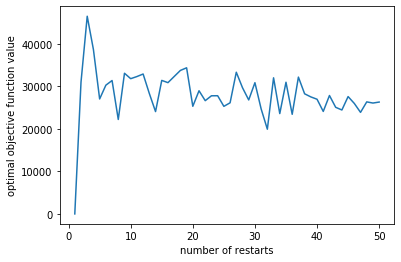

In [24]:
#o = np.zeros(50)
#for i in range(1,50):
  #  o[i]=test(i)
#x = list(range(1,51))
plt.plot(x,o)
plt.xlabel('number of restarts')
plt.ylabel('optimal objective function value')

In [ ]:
print(ofv(A,B,FAQ(A,B)))

In [14]:
one = np.ones(24)
dstoch = 0
M = np.zeros((2*n,n**2))
row = 0
for i in range(n):
    for j in range(n):
        M[row,i*n+j] = 1
        M[row+1,i+n*j] = 1
    row+=2
    
# for loop to test if each my Pinit function is in fact returning doubly stochastic matrices
for i in range(1000):
    P = Pinit(12) # 12x12 doubly stochastic matrix 
    f = M@P.flatten() # multiplying by matrix which computs all row and col sums
    f = [round(x,5) for x in f] #round all floats to tenth place
    if (f == one).all(): #check if all row and col sums are equal to 
        dstoch += 1

print(dstoch/1000) # printing percent accuracy



1.0


In [17]:
with open('qapdata/chr15a.dat') as f:
        f = [int(elem) for elem in f.read().split()]

# adjusting
f = np.array(f[1:])
n = int(math.sqrt(len(f)/2))
print(n)
f = f.reshape(2*n,n)
A = f[:n,:]
B = f[n:,:]
P = np.zeros((n,n))
row = np.array(range(n))
col = np.array([5,10,8,13,12,11,14,2,4,6,7,15,3,1,9])
col = col-[1]*n
P[row,col] = 1
np.trace(A@P@np.transpose(B)@np.transpose(P))
print(np.trace(A@P@np.transpose(B)@np.transpose(P)))


print(test(A,B,100))


15
9896.0
35624.0
